In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
visa_df=pd.read_csv(r"C:\Users\animi\OneDrive\NareshIT\DataFiles\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Select the Numerical columns**

In [82]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Prevailing_Wage**

- len

- max

- min

- mean

- median

- std

- 75%

- 50%

- 25%

**len**

In [12]:
len(visa_df['prevailing_wage'])

25480

**max**

In [14]:
max(visa_df['prevailing_wage']) # noraml

319210.27

In [15]:
visa_df['prevailing_wage'].max() # Pandas

319210.27

In [16]:
np.max(visa_df['prevailing_wage']) # numpy

319210.27

**min**

In [18]:
min(visa_df['prevailing_wage']) # normal

2.1367

In [19]:
visa_df['prevailing_wage'].min() # Pandds

2.1367

In [20]:
np.min(visa_df['prevailing_wage']) # numpy

2.1367

**mean**

In [22]:
visa_df['prevailing_wage'].mean() # pandas

74455.81459209183

In [23]:
np.mean(visa_df['prevailing_wage']) # numpy

74455.81459209183

**median**

In [24]:
visa_df['prevailing_wage'].median() # pandas

70308.20999999999

In [25]:
np.median(visa_df['prevailing_wage']) # numpy

70308.20999999999

**std**

In [26]:
visa_df['prevailing_wage'].std() # pandas

52815.94232687357

In [27]:
np.std(visa_df['prevailing_wage']) # numpy

52814.90589711402

**As it is visa_df here is numerical variable, mode is not a good option**

In [79]:
# All together

list_values=[]
wage_count=round(len(visa_df['prevailing_wage']),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)

list_values=[wage_count,wage_min,wage_max,wage_mean,wage_median,wage_std]
list_values

index_val=['count','min','max','mean','median','std']

pd.DataFrame(list_values,columns=['prevailing_wage'],index=index_val)

,prevailing_wage
count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94


**Percentile and Quantile**

- Percentile:

    - np.percentile()

    - It will take two arguments
        - data: a

            - percentile: q the values varies from 0 to 100

            - If you want 50P data then q=50

- Quantile:

    - np.quantile()

    - It will take two arguments
      
        - data: a

            - percentile: q the values varies from 0 to 1

            - if you want 50p, then q=0.5


**25p-50p-75p**

$Percentile$

In [42]:
wage_25p = round(np.percentile(visa_df['prevailing_wage'],25),2)
wage_50p = round(np.percentile(visa_df['prevailing_wage'],50),2)
wage_75p = round(np.percentile(visa_df['prevailing_wage'],75),2)

print(f"The 25% data is {wage_25p}")
print(f"The 50% data is {wage_50p}")
print(f"The 75% data is {wage_75p}")

The 25% data is 34015.48
The 50% data is 70308.21
The 75% data is 107735.51


$Quantile$

In [44]:
wage_25p = round(np.quantile(visa_df['prevailing_wage'],0.25),2)
wage_50p = round(np.quantile(visa_df['prevailing_wage'],0.5),2)
wage_75p = round(np.quantile(visa_df['prevailing_wage'],0.75),2)

print(f"The 25% data is {wage_25p}")
print(f"The 50% data is {wage_50p}")
print(f"The 75% data is {wage_75p}")

The 25% data is 34015.48
The 50% data is 70308.21
The 75% data is 107735.51


**Understand the percentiles**

- definition of 25 percentile

    - there are 25% of employees has salary less than 34015

    - total employees=25480

    - 25% of employeees = 25*25480/100 = 6370

    - 6370 employees salary less than 34015


$25- percentile$

In [46]:
condition=visa_df['prevailing_wage']<34015
len(visa_df[condition])

6370

In [47]:
condition=visa_df['prevailing_wage']<wage_25p
len(visa_df[condition])

6370

$50 - percentile$

In [49]:
condition=visa_df['prevailing_wage']<wage_50p
len(visa_df[condition])

# 50*25480/100

12740

$75 - perccentile$

In [50]:
condition=visa_df['prevailing_wage']<wage_75p
len(visa_df[condition])

# 75*25480/100

19110

**Emperical Rule (68-95-99.7)**

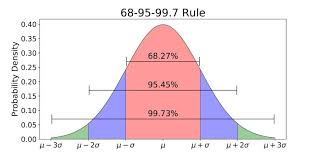

- First calculate mean value

- Second calculate std value

- Condition1: mean-1*std

- Condition2: mean+1*std

- If you apply above conditions on wage data, the output count 
    should be equal to 68 percentile data

- 68% of total employees: 17326

In [66]:
68*25480/100

17326.4

In [65]:
v1 = wage_mean-1*wage_std
v2 = wage_mean+1*wage_std
v1,v2

condition1= visa_df['prevailing_wage']>v1
condition2= visa_df['prevailing_wage']<v2

count1=len(visa_df[condition1 & condition2])

######################################################

count1, 68*25480/100

(17171, 17326.4)

In [68]:
v3 = wage_mean-2*wage_std
v4 = wage_mean+2*wage_std
v3,v4

condition1= visa_df['prevailing_wage']>v3
condition2= visa_df['prevailing_wage']<v4

count2=len(visa_df[condition1 & condition2])
count2

24582

In [69]:
95*25480/100

24206.0

In [70]:
count2, 95*25480/100  # approximately same

(24582, 24206.0)

In [73]:
v5 = wage_mean-3*wage_std
v6 = wage_mean+3*wage_std
v5,v6

condition1= visa_df['prevailing_wage']>v5
condition2= visa_df['prevailing_wage']<v6

count3=len(visa_df[condition1 & condition2])
count3

25186

In [74]:
99.7*25480/100

25403.56

In [76]:
count3, 99.7*25480/100 # approxmimate similar

(25186, 25403.56)

In [80]:
# All together

list_values=[]
wage_count=round(len(visa_df['prevailing_wage']),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)

##################################################

wage_25p = round(np.quantile(visa_df['prevailing_wage'],0.25),2)
wage_50p = round(np.quantile(visa_df['prevailing_wage'],0.5),2)
wage_75p = round(np.quantile(visa_df['prevailing_wage'],0.75),2)

##################################################


list_values=[wage_count,wage_min,wage_max,wage_mean,wage_median,wage_std,wage_25p,wage_50p,wage_75p]
list_values

index_val=['count','min','max','mean','median','std','25%','50%','75%']

pd.DataFrame(list_values,columns=['prevailing_wage'],index=index_val)

,prevailing_wage
count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94
25%,34015.48
50%,70308.21
75%,107735.51


**From above medain and 50% are same**

**Implementing Above all things for No of employees column**

In [83]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [97]:
for i in visa_df.select_dtypes(exclude='object').columns:
    print(f"{i}")

no_of_employees
yr_of_estab
prevailing_wage


In [103]:
# All together
# prevailing_wage
l1=[]
cols=visa_df.select_dtypes(exclude='object').columns

for i in cols: 
    countt=round(len(visa_df[i]),2)
    minn=round(visa_df[i].min(),2)
    maxx=round(visa_df[i].max(),2)
    mean=round(visa_df[i].mean(),2)
    median=round(visa_df[i].median(),2)
    std=round(visa_df[i].std(),2)
    
##################################################

    p_25 = round(np.quantile(visa_df[i],0.25),2)
    p_50 = round(np.quantile(visa_df[i],0.5),2)
    p_75 = round(np.quantile(visa_df[i],0.75),2)

##################################################
    l1.append([countt, minn, maxx, mean, median, std, p_25, p_50, p_75])

l1
index_val=['count','min','max','mean','median','std','25%','50%','75%']
df=pd.DataFrame(l1,columns=index_val,index=cols) # it is coming in reverse, meas cols are index and index becomes columns so use transpose
df=df.T
df




,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
min,-26.00,1800.00,2.14
max,602069.00,2016.00,319210.27
mean,5667.04,1979.41,74455.81
median,2109.00,1997.00,70308.21
std,22877.93,42.37,52815.94
25%,1022.00,1976.00,34015.48
50%,2109.00,1997.00,70308.21
75%,3504.00,2005.00,107735.51


**Describe**

- It is only for numerical data

In [105]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Histogram**

- Histogram can get by matplotlib

- Histogram can get by seaborn also

- plt.hist()

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

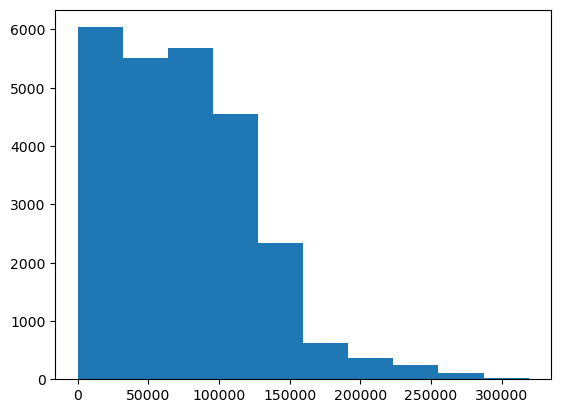

In [109]:
import matplotlib.pyplot as plt

plt.hist(visa_df['prevailing_wage'])
#plt.show()

- from interval range 

    - 2.13670000e+00 to 3.19229500e+04


        - 6038 members have salary between above range


    - 3.19229500e+04 to 6.38437634e+04


        - 5504 members have salary between above range
          

- Histogram will give 3 outputs

    - frequency

        - in each interval range how many observtions are there

    - interval
 
    - number of intervals

**Check point-1**

In [113]:
2.13670000e+00, 3.19229500e+04

(2.1367, 31922.95)

In [112]:
con1=visa_df['prevailing_wage']>=2.1367
con2=visa_df['prevailing_wage']<31922.95
len(visa_df[con1 & con2])

6038

**Bins**

<BarContainer object of 40 artists>


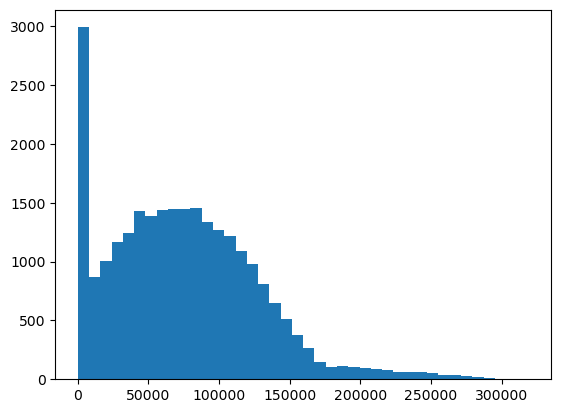

In [118]:
import matplotlib.pyplot as plt

f,i,n = plt.hist(visa_df['prevailing_wage'],
        bins=40) # bins means more intervals


print(n)

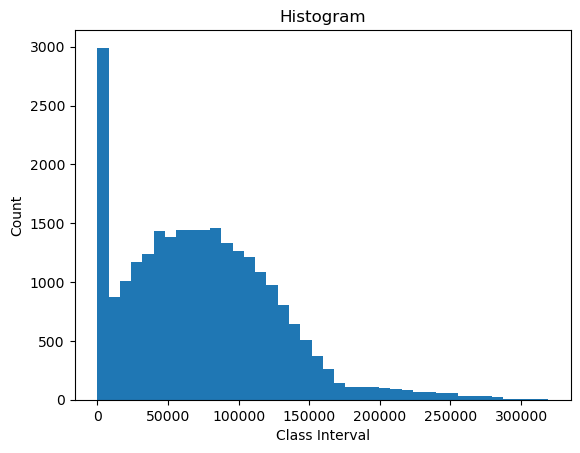

In [119]:
import matplotlib.pyplot as plt

plt.hist(visa_df['prevailing_wage'], bins=40)
plt.title("Histogram")
plt.xlabel("Class Interval")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

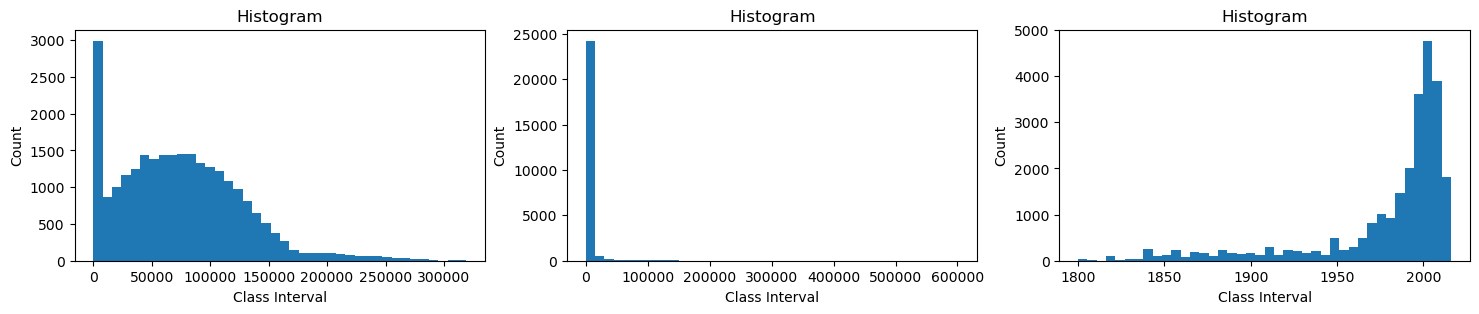

In [122]:
# draw 3 subplots

import matplotlib.pyplot as plt

plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
plt.hist(visa_df['prevailing_wage'], bins=40)
plt.title("Histogram")
plt.xlabel("Class Interval")
plt.ylabel("Count")


plt.subplot(1,3,2)
plt.hist(visa_df['no_of_employees'], bins=40)
plt.title("Histogram")
plt.xlabel("Class Interval")
plt.ylabel("Count")


plt.subplot(1,3,3)
plt.hist(visa_df['yr_of_estab'], bins=40)
plt.title("Histogram")
plt.xlabel("Class Interval")
plt.ylabel("Count")


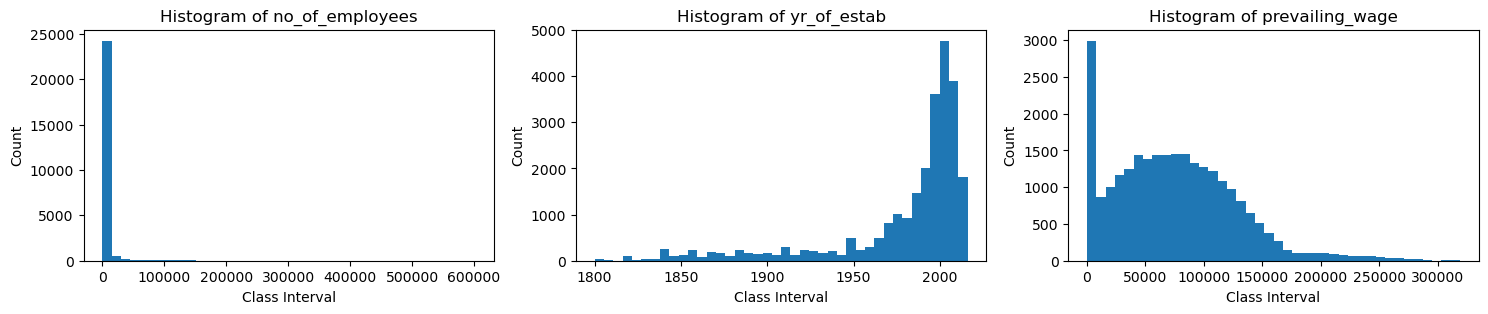

In [126]:
# draw 3 subplots

cols=visa_df.select_dtypes(exclude='object').columns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,3))

for i in range(len(cols)):
    plt.subplot(1,len(cols),i+1)
    plt.hist(visa_df[cols[i]], bins=40)
    plt.title(f"Histogram of {cols[i]}")
    plt.xlabel("Class Interval")
    plt.ylabel("Count")

**Histogram using seaborn**

- histplot

- distplot

C:\Users\Alekhya\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevailing_wage', ylabel='Count'>

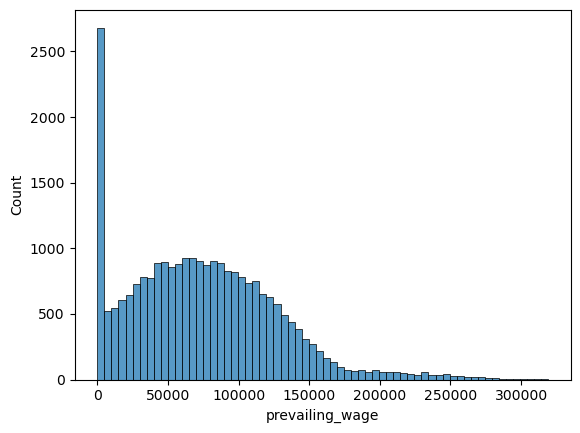

In [129]:
import seaborn as sns

sns.histplot(visa_df['prevailing_wage'])

C:\Users\animi\AppData\Local\Temp\ipykernel_16188\1931405278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visa_df['prevailing_wage'])
C:\Users\Alekhya\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevailing_wage', ylabel='Density'>

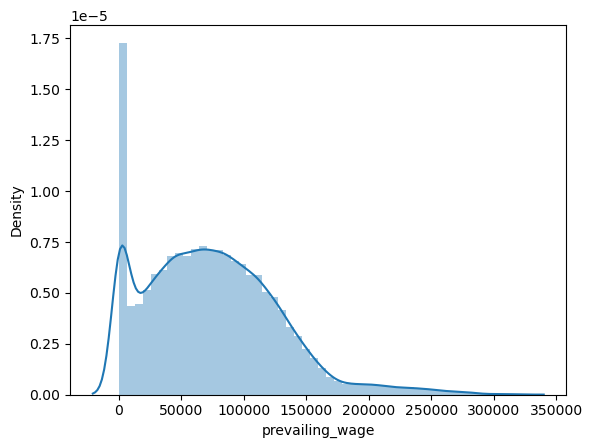

In [130]:
import seaborn as sns

sns.distplot(visa_df['prevailing_wage'])

**To avoid warnings**

- import warnings

- warnings.filterwarnings("ignore")

<Axes: xlabel='prevailing_wage', ylabel='Count'>

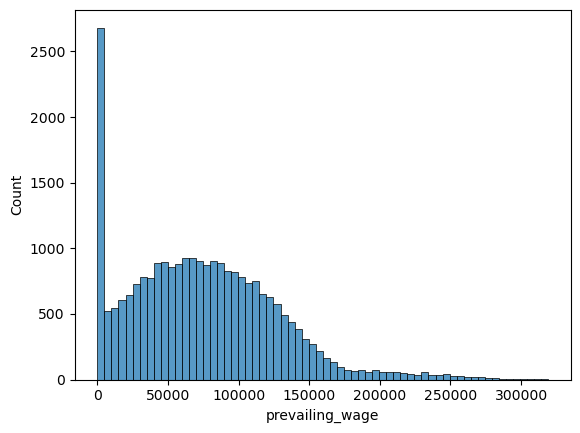

In [131]:
import warnings
warnings.filterwarnings("ignore")
sns.histplot(visa_df['prevailing_wage'])